In [21]:
# Render plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats

pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
df = pd.read_csv('year_counsellor_stage_dayofyear.csv', encoding="utf-8-sig").fillna(0)
df.columns

Index(['Year', 'DashboardOwner', 'Stage', 'Dayofyear'], dtype='object')

In [68]:
year_stage = df.drop('DashboardOwner', 1)
year_stage[:5]

,Year,Stage,Dayofyear
0,2014,Inq,340
1,2016,Inq,155
2,2017,Inq,37
3,2016,Inq,271
4,2017,Inq,26


In [4]:
year_stage['Count'] = pd.Series(1, index=year_stage.index)
len(year_stage.loc[year_stage['Stage'] == 'Sub'])

8082

In [5]:
year_stage = year_stage.groupby(['Year', 'Stage', 'Dayofyear']).count().sort_index(ascending=False)
year_stage[:5]

Count
Year Stage Dayofyear       
2017 Sub   337            2
           336            2
           335            2
           334            3
           333            1

In [6]:
year_stage = year_stage.reset_index(level=[0,1,2])
year_stage[:5]

,Year,Stage,Dayofyear,Count
0,2017,Sub,337,2
1,2017,Sub,336,2
2,2017,Sub,335,2
3,2017,Sub,334,3
4,2017,Sub,333,1


In [7]:
year_stage = year_stage.drop('Dayofyear', 1)
year_stage[:5]

,Year,Stage,Count
0,2017,Sub,2
1,2017,Sub,2
2,2017,Sub,2
3,2017,Sub,3
4,2017,Sub,1


In [72]:
x = year_stage
x = x.loc[(x['Year'] == 2016)] # & (x['Stage'] == 'Inq')]
#x = x.loc[(x['Stage'] == 'Adm')]
x = x.sample(50)

print(stats.shapiro(x['Dayofyear']))
print(stats.normaltest(x['Dayofyear']))

(0.8680101037025452, 4.9376401875633746e-05)
NormaltestResult(statistic=8.1335151376126245, pvalue=0.017132850632158646)


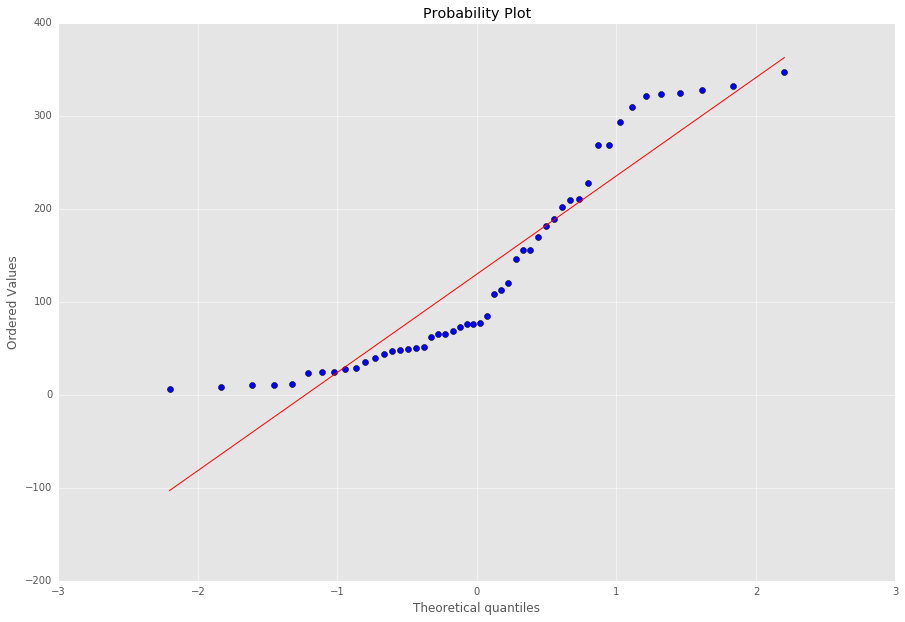

In [73]:
plt.rcParams['figure.figsize'] = (15, 10)
y = stats.probplot(x['Dayofyear'], dist='norm', plot=plt)

In [59]:
year_stage['n'] = pd.Series(1, index=year_stage.index)
year_stage[:5]

,Year,Stage,Count,n
0,2017,Sub,2,1
1,2017,Sub,2,1
2,2017,Sub,2,1
3,2017,Sub,3,1
4,2017,Sub,1,1


In [116]:
year_stage.sort_values('Count', ascending=False)

,Year,Stage,Count,n
1498,2017,Act,21,1
1473,2017,Adm,20,1
2210,2016,Inq,20,1
2962,2016,Act,20,1
5123,2014,Inq,20,1
304,2017,Sub,20,1
5121,2014,Inq,20,1
5120,2014,Inq,20,1
2185,2016,Inq,20,1
5116,2014,Inq,20,1


In [117]:
year_stage = year_stage.groupby(['Year', 'Stage', 'Count']).count().sort_index(ascending=False)
year_stage[:5]

n
Year Stage Count    
2017 Sub   20      1
           19      3
           18      7
           17     12
           16      7

In [118]:
year_stage = year_stage.reset_index(level=[0,1,2])
year_stage

,Year,Stage,Count,n
0,2017,Sub,20,1
1,2017,Sub,19,3
2,2017,Sub,18,7
3,2017,Sub,17,12
4,2017,Sub,16,7
5,2017,Sub,15,7
6,2017,Sub,14,5
7,2017,Sub,13,3
8,2017,Sub,12,12
9,2017,Sub,11,10


In [119]:
ys = year_stage.loc[year_stage['Stage'] == 'Inq']
ys[:5]

,Year,Stage,Count,n
44,2017,Inq,20,7
45,2017,Inq,19,11
46,2017,Inq,18,12
47,2017,Inq,17,10
48,2017,Inq,16,6


In [120]:
pivot = ys.pivot_table(index='Count', columns=['Year','Stage']).fillna(0)
pivot[:5]

n               
Year  2014 2015 2016 2017
Stage  Inq  Inq  Inq  Inq
Count                    
1       30   16   19   21
2       12   16   20   13
3       20   23   18   26
4       11   11   14   23
5       21   29   15   39

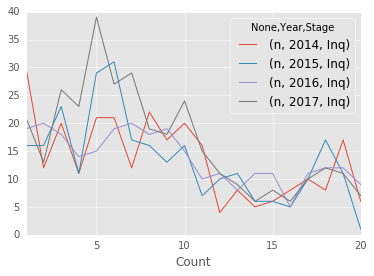

In [121]:
matplotlib.style.use('ggplot')
plt.figure()
pivot.plot()

In [ ]:
for stage in ['Inq', 'Sub', 'Com', 'Adm', 'Dep', 'Pre', 'Pay', 'Act']:
    print(stage)
    ys = year_stage.loc[year_stage['Stage'] == stage]
    pivot = ys.pivot_table(index='Count', columns='Year').fillna(0)
    plt.figure()
    pivot.plot(colormap='Dark2')
    #cumulative = pivot.cumsum()
    #cumulative.plot()